# Equalizing image histograms

Image histograms are used to reflect intensity distribution. Properties of histograms depend on image properties. For example, low-contrast images have histograms where bins are clustered near a value: most of the pixels have their values within a narrow range. Low-contrast images are harder to work with because small details are poorly expressed. There is a technique that is able to address this issue. It's called histogram equalization. This recipe covers usage of the approach in OpenCV. We study how to perform histogram equalization for both grayscale and full color images.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


Original
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
image_COLOR_BGR2GRAY
  Shape: (512, 512)   Data type: float32
[ 0.6362471 0.6362471 0.6363059 0.63176864 0.63631374 0.61380786 0.64000005 ]  image_COLOR_BGR2GRAY: float32
image_COLOR_BGR2GRAY_255
  Shape: (512, 512)   Data type: uint8
[ 162 162 162 161 162 156 163 160 164 160 ]  image_COLOR_BGR2GRAY_255: uint8
image_0_grey
  Shape: (512, 512)   Data type: uint8
[ 169 169 168 167 169 164 170 167 170 167 ]  image_0_grey: uint8


<Figure size 1080x1080 with 0 Axes>

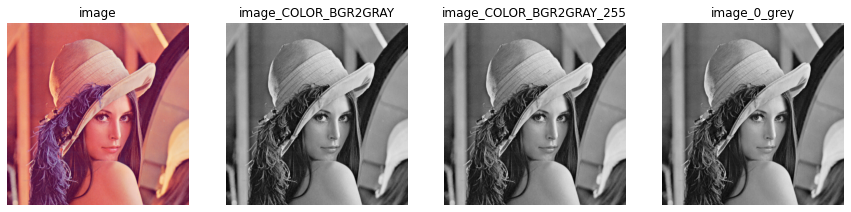

In [2]:
image_0_grey = cv2.imread('../data/Lena.png', 0)

image = cv2.imread('data/Lena.png')
image_float32 = np.copy(image).astype(np.float32) / 255
image_COLOR_BGR2GRAY = cv2.cvtColor(image_float32, cv2.COLOR_BGR2GRAY)
image_COLOR_BGR2GRAY_255 = np.copy(image_COLOR_BGR2GRAY*255)
image_COLOR_BGR2GRAY_255 = image_COLOR_BGR2GRAY_255.astype(np.uint8)



######################################################
print_image('Original', 'image',  image,0,1,0,7)
print_image('image_COLOR_BGR2GRAY', 'image_COLOR_BGR2GRAY',  image_COLOR_BGR2GRAY,0,1,0,7)
print_image('image_COLOR_BGR2GRAY_255', 'image_COLOR_BGR2GRAY_255',  image_COLOR_BGR2GRAY_255,0,1,0,10)
print_image('image_0_grey', 'image_0_grey',  image_0_grey,0,1,0,10)

plt.figure(figsize=(15,15))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_COLOR_BGR2GRAY",image_COLOR_BGR2GRAY],
                    ["image_COLOR_BGR2GRAY_255",image_COLOR_BGR2GRAY_255],
                    ["image_0_grey",image_0_grey]  
                   ])

In [3]:
image_grey_equalizeHist = cv2.equalizeHist(image_0_grey)



###################################################
print_image('image_grey_equalizeHist == cv2.equalizeHist(image_0_grey)', 'image_equalizeHist',  
            image_grey_equalizeHist,0,1,0,10)
print_image('image_0_grey', 'image_0_grey',  image_0_grey,0,1,0,10)
print_image('image_COLOR_BGR2GRAY_255', 'image_COLOR_BGR2GRAY_255',  image_COLOR_BGR2GRAY_255,0,1,0,10)

cv2.imshow('image_0_grey -> image_equalizeHist, image_COLOR_BGR2GRAY*255', 
           np.hstack([image_0_grey, image_grey_equalizeHist, image_COLOR_BGR2GRAY_255]))
cv2.waitKey()
cv2.destroyAllWindows()

image_grey_equalizeHist == cv2.equalizeHist(image_0_grey)
  Shape: (512, 512)   Data type: uint8
[ 204 204 203 201 204 195 206 201 206 201 ]  image_equalizeHist: uint8
image_0_grey
  Shape: (512, 512)   Data type: uint8
[ 169 169 168 167 169 164 170 167 170 167 ]  image_0_grey: uint8
image_COLOR_BGR2GRAY_255
  Shape: (512, 512)   Data type: uint8
[ 162 162 162 161 162 156 163 160 164 160 ]  image_COLOR_BGR2GRAY_255: uint8


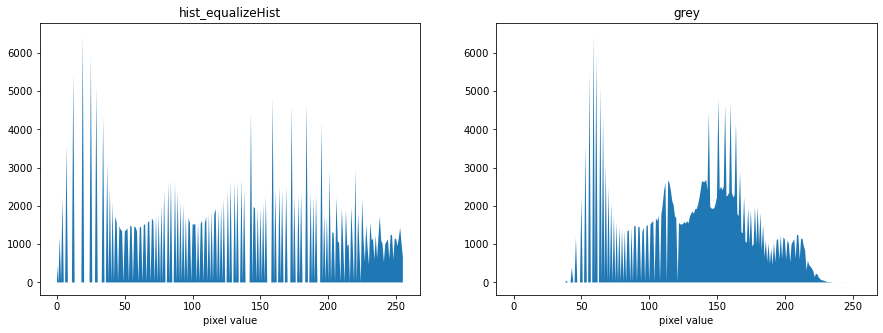

<Figure size 1080x1080 with 0 Axes>

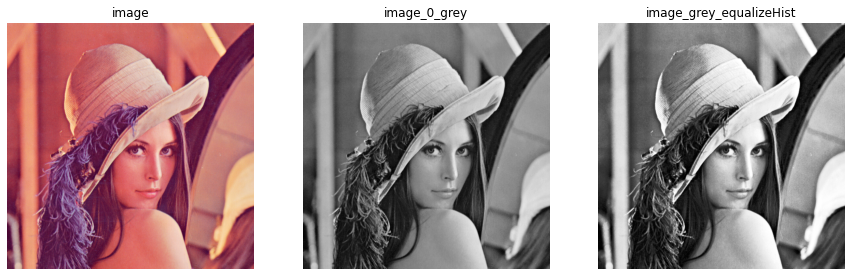

In [4]:
hist_grey_equalizeHist, bins_grey_equalizeHist = np.histogram(image_grey_equalizeHist, 256, [0, 255])

hist_grey, bins_grey = np.histogram(image_0_grey, 256, [0, 255])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("hist_equalizeHist")
plt.fill_between(range(256), hist_grey_equalizeHist, 0)
plt.xlabel('pixel value')
plt.subplot(1,2,2)
plt.title("grey")
plt.fill_between(range(256), hist_grey, 0)
plt.xlabel('pixel value')
plt.show()


#################################################
plt.figure(figsize=(15,15))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_0_grey",image_0_grey],
                    ["image_grey_equalizeHist",image_grey_equalizeHist]
                   ])

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
image_equalizeHist
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 216] [125 137 216] [133 137 205] [128 136 205] [120 138 216] [116 129 216] [123 138 221] ]  image_equalizeHist: uint8


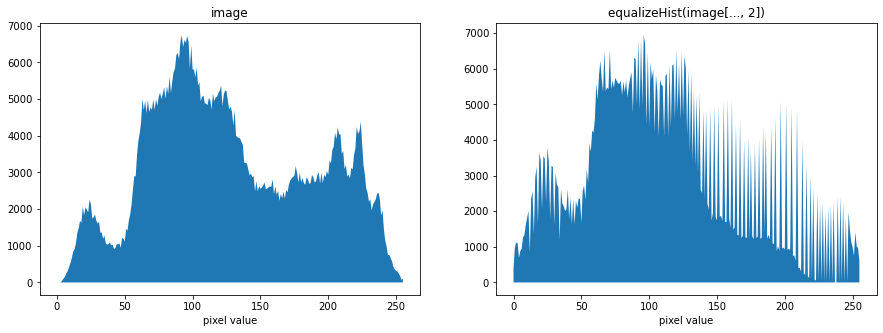

<Figure size 1080x720 with 0 Axes>

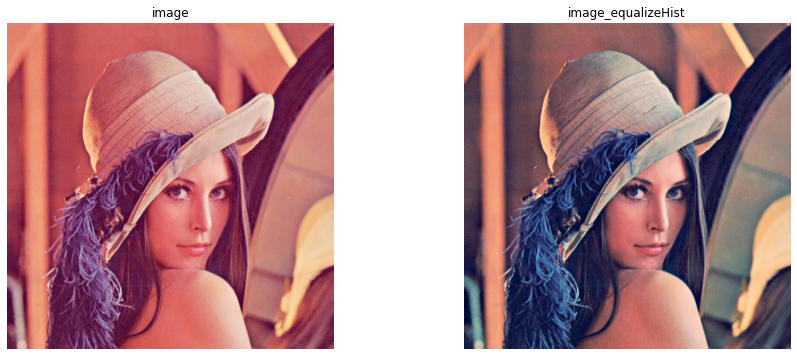

In [5]:
hist_image, bins_image = np.histogram(image, 256, [0, 255])

image_equalizeHist = np.copy(image)
image_equalizeHist[..., 2] = cv2.equalizeHist(image_equalizeHist[..., 2])
hist_image_equalizeHist, bins_image_equalizeHist = np.histogram(image_equalizeHist, 256, [0, 255])


#######################################################
print_image('image', 'image',  image,0,1,0,7)
print_image('image_equalizeHist', 'image_equalizeHist',  image_equalizeHist,0,1,0,7)





plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("image")
plt.fill_between(range(256), hist_image, 0)
plt.xlabel('pixel value')
plt.subplot(1,2,2)
plt.title("equalizeHist(image[..., 2])")
plt.fill_between(range(256), hist_image_equalizeHist, 0)
plt.xlabel('pixel value')
plt.show()



#################################################
plt.figure(figsize=(15,10))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_equalizeHist",image_equalizeHist[:,:,[2,1,0]]]
                   ])

cv2.imshow('cv2.equalizeHist(image)', np.hstack([image, image_equalizeHist]))
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
image_equalizeHist_0 = cv2.equalizeHist(image[:,:,[0]])
image_equalizeHist_1 = cv2.equalizeHist(image[:,:,[1]])
image_equalizeHist_2 = cv2.equalizeHist(image[:,:,[2]])


########################################################
print_image('image_equalizeHist_0', 'image_equalizeHist_0',  image_equalizeHist_0,0,1,0,10)
print_image('image_equalizeHist_1', 'image_equalizeHist_1',  image_equalizeHist_1,0,1,0,10)
print_image('image_equalizeHist_2', 'image_equalizeHist_2',  image_equalizeHist_2,0,1,0,10)

image_equalizeHist_0
  Shape: (512, 512)   Data type: uint8
[ 194 194 208 200 180 168 188 191 198 177 ]  image_equalizeHist_0: uint8
image_equalizeHist_1
  Shape: (512, 512)   Data type: uint8
[ 196 196 196 194 198 181 198 190 201 194 ]  image_equalizeHist_1: uint8
image_equalizeHist_2
  Shape: (512, 512)   Data type: uint8
[ 216 216 205 205 216 216 221 219 219 213 ]  image_equalizeHist_2: uint8


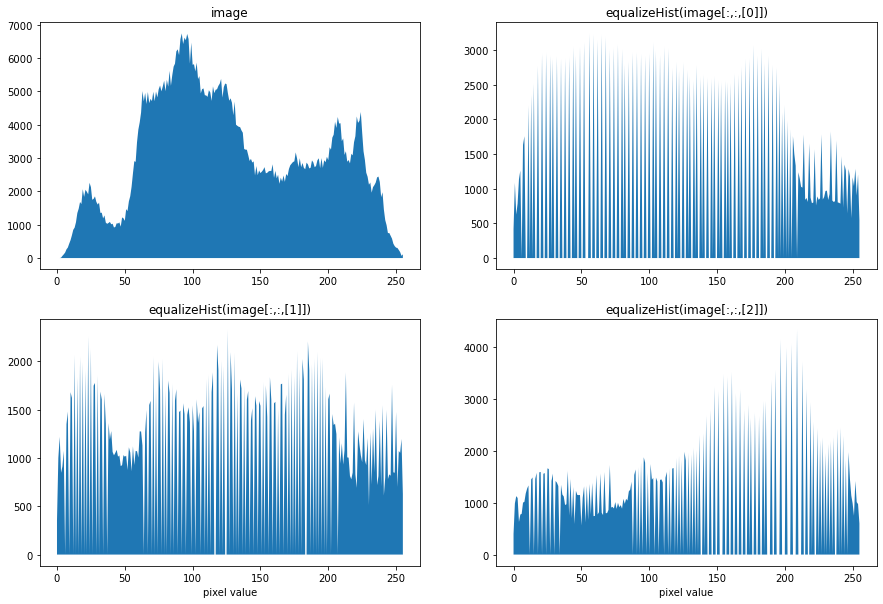

<Figure size 1080x720 with 0 Axes>

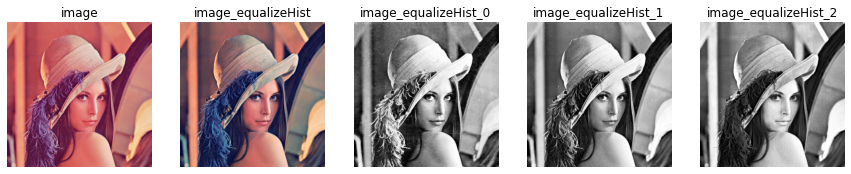

In [7]:
hist_image_equalizeHist0, bins_image_equalizeHist = np.histogram(image_equalizeHist_0, 256, [0, 255])
hist_image_equalizeHist1, bins_image_equalizeHist = np.histogram(image_equalizeHist_1, 256, [0, 255])
hist_image_equalizeHist2, bins_image_equalizeHist = np.histogram(image_equalizeHist_2, 256, [0, 255])

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("image")
plt.fill_between(range(256), hist_image, 0)
#plt.xlabel('pixel value')
plt.subplot(2,2,2)
plt.title("equalizeHist(image[:,:,[0]])")
plt.fill_between(range(256), hist_image_equalizeHist0, 0)
#plt.xlabel('pixel value')
plt.subplot(2,2,3)
plt.title("equalizeHist(image[:,:,[1]])")
plt.fill_between(range(256), hist_image_equalizeHist1, 0)
plt.xlabel('pixel value')
plt.subplot(2,2,4)
plt.title("equalizeHist(image[:,:,[2]])")
plt.fill_between(range(256), hist_image_equalizeHist2, 0)
plt.xlabel('pixel value')
plt.show()


##################################################################
plt.figure(figsize=(15,10))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_equalizeHist",image_equalizeHist[:,:,[2,1,0]]],
                    ["image_equalizeHist_0",image_equalizeHist_0],
                    ["image_equalizeHist_1",image_equalizeHist_1],
                    ["image_equalizeHist_2",image_equalizeHist_2]
                   ])

cv2.imshow('cv2.equalizeHist(image[:,:,[0]] -> [:,:,[1]] -> [:,:,[2]])', 
           np.hstack([image_equalizeHist_0, image_equalizeHist_1,image_equalizeHist_2]))
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
image_equalizeHist_COLOR_BGR2GRAY_255 = cv2.equalizeHist(image_COLOR_BGR2GRAY_255)

print_image('image_COLOR_BGR2GRAY_255', 'image_COLOR_BGR2GRAY_255',  image_COLOR_BGR2GRAY_255,0,1,0,10)
print_image('image_equalizeHist_COLOR_BGR2GRAY_255', 'image_equalizeHist_COLOR_BGR2GRAY_255',  
            image_equalizeHist_COLOR_BGR2GRAY_255,0,1,0,10)

image_COLOR_BGR2GRAY_255
  Shape: (512, 512)   Data type: uint8
[ 162 162 162 161 162 156 163 160 164 160 ]  image_COLOR_BGR2GRAY_255: uint8
image_equalizeHist_COLOR_BGR2GRAY_255
  Shape: (512, 512)   Data type: uint8
[ 203 203 203 201 203 191 204 199 206 199 ]  image_equalizeHist_COLOR_BGR2GRAY_255: uint8


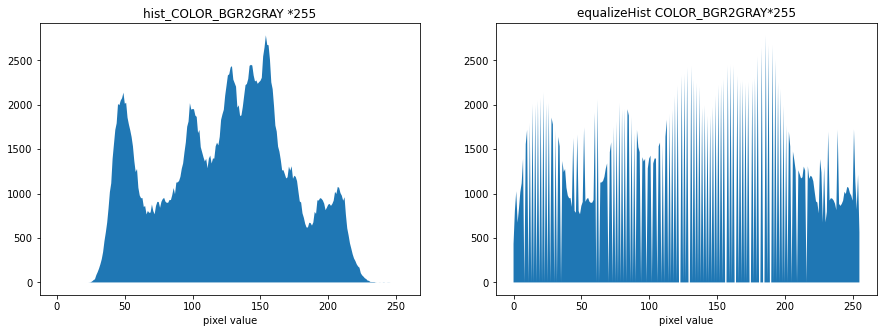

<Figure size 1080x720 with 0 Axes>

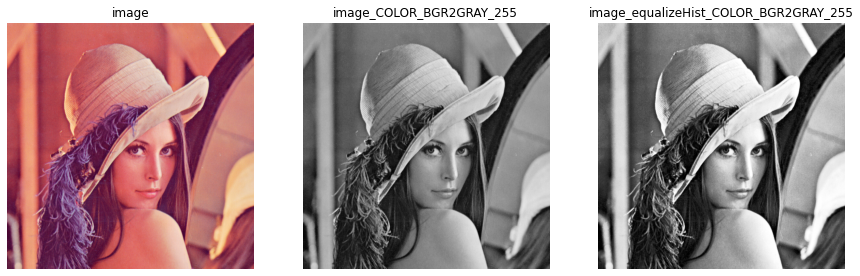

In [9]:
hist_COLOR_BGR2GRAY_255, bins_COLOR_BGR2GRAY_255 = np.histogram(image_COLOR_BGR2GRAY_255, 256, [0, 255])
hist_equalizeHist_COLOR_BGR2GRAY_255, \
                    bins_image_COLOR_BGR2GRAY255 = np.histogram(image_equalizeHist_COLOR_BGR2GRAY_255, 256, [0, 255])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("hist_COLOR_BGR2GRAY *255")
plt.fill_between(range(256), hist_COLOR_BGR2GRAY_255, 0)
plt.xlabel('pixel value')
plt.subplot(1,2,2)
plt.title("equalizeHist COLOR_BGR2GRAY*255")
plt.fill_between(range(256), hist_equalizeHist_COLOR_BGR2GRAY_255, 0)
plt.xlabel('pixel value')
plt.show()



##########################################################
plt.figure(figsize=(15,10))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_COLOR_BGR2GRAY_255",image_COLOR_BGR2GRAY_255],
                    ["image_equalizeHist_COLOR_BGR2GRAY_255",image_equalizeHist_COLOR_BGR2GRAY_255]
                   ])

cv2.imshow('image_COLOR_BGR2GRAY_255, equalizeHist(COLOR_BGR2GRAY_255)', 
           np.hstack([image_COLOR_BGR2GRAY_255, image_equalizeHist_COLOR_BGR2GRAY_255]))
cv2.waitKey()
cv2.destroyAllWindows()

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
COLOR_BGR2HSV
  Shape: (512, 512, 3)   Data type: uint8
[ [  4 114 226] [  4 114 226] [  1 103 223] [  3 109 223] [  5 120 226] [  4 124 226] [  4 117 228] ]  hsv: uint8


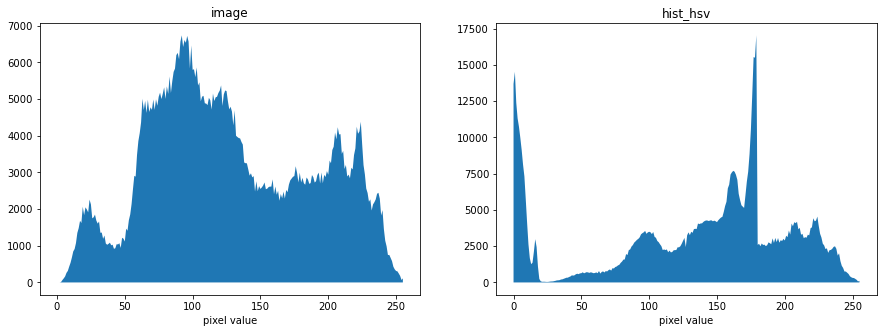

<Figure size 1080x720 with 0 Axes>

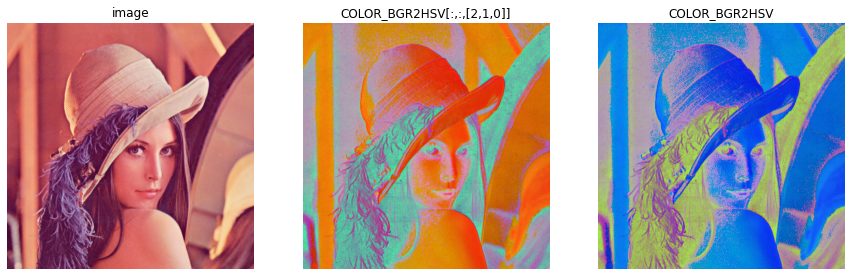

In [10]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#################################################
print_image('image', 'image',  image,0,1,0,7)
print_image('COLOR_BGR2HSV', 'hsv',  hsv,0,1,0,7)




hist_image, bins_image = np.histogram(image, 256, [0, 255])
hist_hsv, bins_hsv     = np.histogram(hsv, 256, [0, 255])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("image")
plt.fill_between(range(256), hist_image, 0)
plt.xlabel('pixel value')
plt.subplot(1,2,2)
plt.title("hist_hsv")
plt.fill_between(range(256), hist_hsv, 0)
plt.xlabel('pixel value')
plt.show()


######################################################
plt.figure(figsize=(15,10))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["COLOR_BGR2HSV[:,:,[2,1,0]]",hsv[:,:,[2,1,0]]],
                    ["COLOR_BGR2HSV",hsv]
                   ])

cv2.imshow('image, COLOR_BGR2HSV', np.hstack([image, hsv]))
cv2.waitKey()
cv2.destroyAllWindows()

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
COLOR_HSV2BGR(equalizeHist(hsv==COLOR_BGR2HSV))
  Shape: (512, 512, 3)   Data type: uint8
[ [119 132 216] [119 132 216] [122 124 205] [117 126 205] [114 131 216] [110 124 216] [119 133 221] ]  image_COLOR_HSV2BGR_equalizeHist: uint8
COLOR_BGR2HSV
  Shape: (512, 512, 3)   Data type: uint8
[ [  4 114 226] [  4 114 226] [  1 103 223] [  3 109 223] [  5 120 226] [  4 124 226] [  4 117 228] ]  hsv: uint8
hsv_equalizeHist
  Shape: (512, 512, 3)   Data type: uint8
[ [  4 114 216] [  4 114 216] [  1 103 205] [  3 109 205] [  5 120 216] [  4 124 216] [  4 117 221] ]  hsv_equalizeHist: uint8


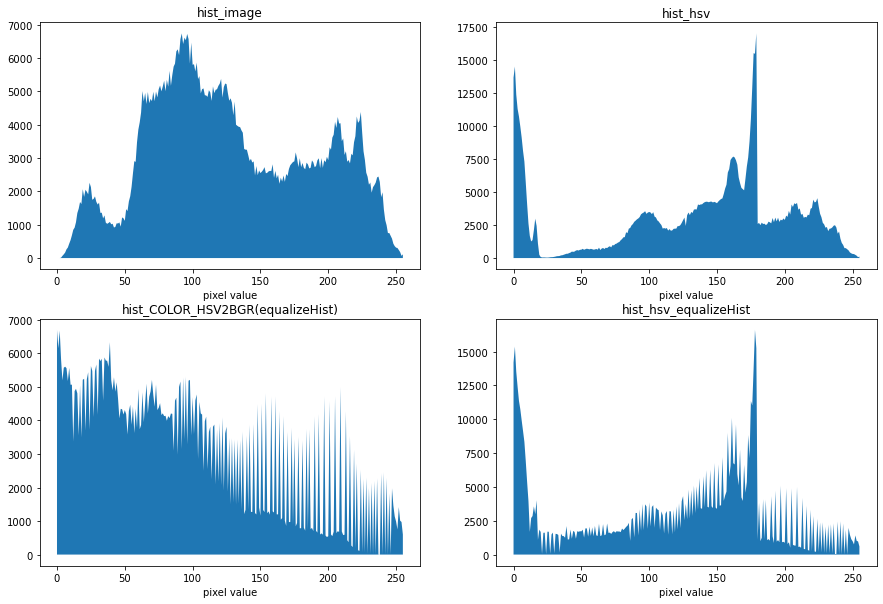

<Figure size 1296x1080 with 0 Axes>

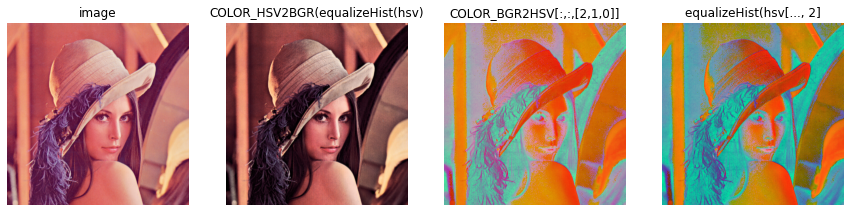

In [11]:
hsv_equalizeHist = np.copy(hsv)
hsv_equalizeHist[..., 2] = cv2.equalizeHist(hsv_equalizeHist[..., 2])

image_COLOR_HSV2BGR_equalizeHist = cv2.cvtColor(hsv_equalizeHist, cv2.COLOR_HSV2BGR)


#################################################
print_image('image', 'image',  image,0,1,0,7)
print_image('COLOR_HSV2BGR(equalizeHist(hsv==COLOR_BGR2HSV))', 'image_COLOR_HSV2BGR_equalizeHist',  
            image_COLOR_HSV2BGR_equalizeHist,0,1,0,7)
print_image('COLOR_BGR2HSV', 'hsv',  hsv,0,1,0,7)
print_image('hsv_equalizeHist', 'hsv_equalizeHist',  hsv_equalizeHist,0,1,0,7)




hist_image, bins_image = np.histogram(image, 256, [0, 255])
hist_hsv, bins_hsv = np.histogram(hsv, 256, [0, 255])
hist_hsv_equalizeHist, bins_hsv_equalizeHist = np.histogram(hsv_equalizeHist, 256, [0, 255])
hist_COLOR_HSV2BGR, bins_COLOR_HSV2BGR = np.histogram(image_COLOR_HSV2BGR_equalizeHist, 256, [0, 255])

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("hist_image")
plt.fill_between(range(256), hist_image, 0)
plt.xlabel('pixel value')
plt.subplot(2,2,2)
plt.title("hist_hsv")
plt.fill_between(range(256), hist_hsv, 0)
plt.xlabel('pixel value')
plt.subplot(2,2,3)
plt.title("hist_COLOR_HSV2BGR(equalizeHist)")
plt.fill_between(range(256), hist_COLOR_HSV2BGR, 0)
plt.xlabel('pixel value')
plt.subplot(2,2,4)
plt.title("hist_hsv_equalizeHist")
plt.fill_between(range(256), hist_hsv_equalizeHist, 0)
plt.xlabel('pixel value')

plt.show()


#########################################################
plt.figure(figsize=(18,15))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["COLOR_HSV2BGR(equalizeHist(hsv)",image_COLOR_HSV2BGR_equalizeHist[:,:,[2,1,0]]],
                    ["COLOR_BGR2HSV[:,:,[2,1,0]]",hsv[:,:,[2,1,0]]],
                    #["COLOR_BGR2HSV",hsv],
                    ["equalizeHist(hsv[..., 2]",hsv_equalizeHist[:,:,[2,1,0]]]
                   ])

cv2.imshow('image, COLOR_BGR2HSV, equalizeHist(hsv_equalizeHist[..., 2])', 
           np.hstack([image, image_COLOR_HSV2BGR_equalizeHist]))
cv2.waitKey()
cv2.destroyAllWindows()